In [73]:
# March 8 2019

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [74]:
# dir = os.getcwd()
# for  dirname, _, filenames in os.walk(dir):
#     for filename in filenames:
#         print(os.path.join(dirname,filename))

In [75]:
print(dir)

<built-in function dir>


In [76]:
# file =  os.path.join(dirname, 'Weather Data.csv')
data = pd.read_csv('C:/Users/TIYASA/Weather Data.csv')

In [77]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [78]:
data['Date/Time']

0          1/1/2012 0:00
1          1/1/2012 1:00
2          1/1/2012 2:00
3          1/1/2012 3:00
4          1/1/2012 4:00
              ...       
8779    12/31/2012 19:00
8780    12/31/2012 20:00
8781    12/31/2012 21:00
8782    12/31/2012 22:00
8783    12/31/2012 23:00
Name: Date/Time, Length: 8784, dtype: object

In [79]:
data['Temp_C']

0      -1.8
1      -1.8
2      -1.8
3      -1.5
4      -1.5
       ... 
8779    0.1
8780    0.2
8781   -0.5
8782   -0.2
8783    0.0
Name: Temp_C, Length: 8784, dtype: float64

In [80]:
data_modified = data[['Date/Time','Temp_C']]

In [81]:
data_modified

,Date/Time,Temp_C
0,1/1/2012 0:00,-1.8
1,1/1/2012 1:00,-1.8
2,1/1/2012 2:00,-1.8
3,1/1/2012 3:00,-1.5
4,1/1/2012 4:00,-1.5
...,...,...
8779,12/31/2012 19:00,0.1
8780,12/31/2012 20:00,0.2
8781,12/31/2012 21:00,-0.5
8782,12/31/2012 22:00,-0.2


In [82]:
data_modified['Date/Time'] = pd.to_datetime(data_modified['Date/Time'])

C:\Users\TIYASA\AppData\Local\Temp\ipykernel_22040\4116046832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['Date/Time'] = pd.to_datetime(data_modified['Date/Time'])


In [83]:
data_modified

,Date/Time,Temp_C
0,2012-01-01 00:00:00,-1.8
1,2012-01-01 01:00:00,-1.8
2,2012-01-01 02:00:00,-1.8
3,2012-01-01 03:00:00,-1.5
4,2012-01-01 04:00:00,-1.5
...,...,...
8779,2012-12-31 19:00:00,0.1
8780,2012-12-31 20:00:00,0.2
8781,2012-12-31 21:00:00,-0.5
8782,2012-12-31 22:00:00,-0.2


In [84]:
# Extract date from DateTime column

data_modified['Date'] = data_modified['Date/Time'].dt.date

C:\Users\TIYASA\AppData\Local\Temp\ipykernel_22040\4066332996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['Date'] = data_modified['Date/Time'].dt.date


In [85]:
data_avg_temperature = data_modified.groupby('Date')['Temp_C'].mean().reset_index()

In [86]:
data_avg_temperature

,Date,Temp_C
0,2012-01-01,0.629167
1,2012-01-02,0.041667
2,2012-01-03,-14.416667
3,2012-01-04,-13.645833
4,2012-01-05,-6.750000
...,...,...
361,2012-12-27,-5.833333
362,2012-12-28,-6.775000
363,2012-12-29,-11.345833
364,2012-12-30,-11.370833


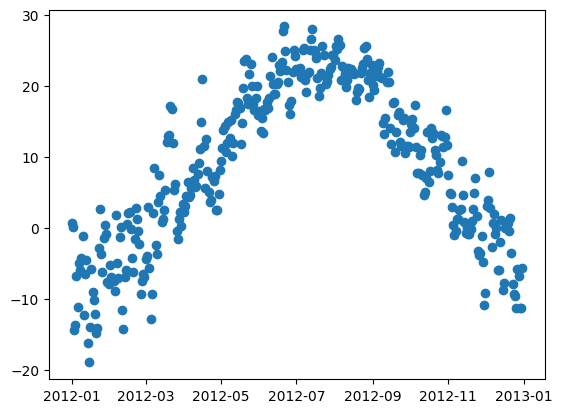

In [87]:
plt.scatter(data_avg_temperature['Date'],data_avg_temperature['Temp_C'])

In [88]:
def quadratic_func(x,a,b,c):
    return a+b*x+c*x**2

In [89]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(quadratic_func,np.arange(len(data_avg_temperature['Date'])),np.array(data_avg_temperature['Temp_C']))

In [90]:
popt

array([-1.73468538e+01,  3.82960641e-01, -9.83722479e-04])

In [91]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']


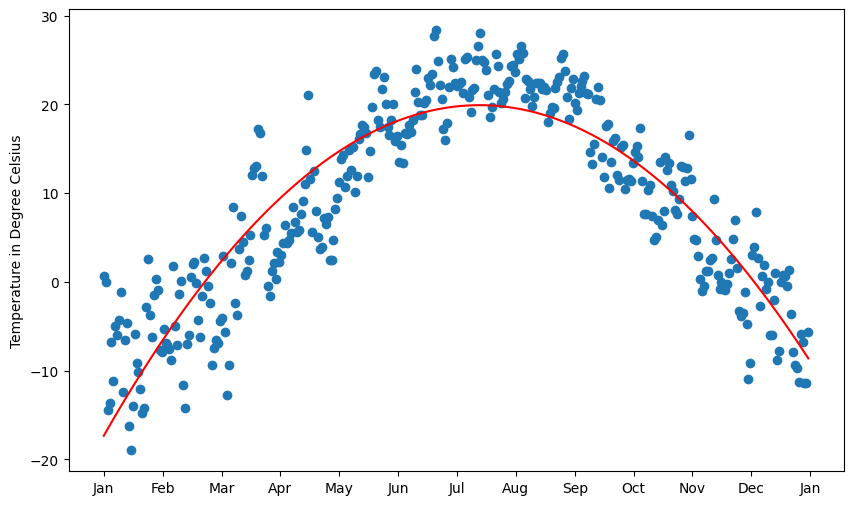

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(len(data_avg_temperature['Date'])),data_avg_temperature['Temp_C'])
plt.plot(np.arange(len(data_avg_temperature['Date'])),quadratic_func(np.arange(len(data_avg_temperature['Date'])),*popt),'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) 
plt.xticks(np.linspace(0,len(data_avg_temperature['Date']),13), months)
plt.ylabel('Temperature in Degree Celsius')
plt.show()

We kind of smoothed out the temperature 

In [93]:
# Exponentially weighted average


Temp = []
beta = 0.98
for i in range(len(data_avg_temperature['Temp_C'])-1):
    temp_i = beta*data_avg_temperature['Temp_C'][i]+(1-beta)*data_avg_temperature['Temp_C'][i+1]
    Temp.append(temp_i)
    


In [94]:
len(Temp)

365

In [95]:
#Temp[1], data_avg_temperature['Temp_C'][1]

Temp.insert(0, data_avg_temperature['Temp_C'][0]) # Keep the first day's temperature as it is

In [96]:
# plt.figure(figsize=(10,6))
# plt.scatter(np.arange(len(data_avg_temperature['Date'])),data_avg_temperature['Temp_C'])
# plt.plot(np.arange(len(data_avg_temperature['Date'])),quadratic_func(np.arange(len(data_avg_temperature['Date'])),*popt),'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) 
# plt.plot(np.arange(len(data_avg_temperature['Date'])),np.array(Temp),'m-')
# plt.xticks(np.linspace(0,len(data_avg_temperature['Date']),13), months)
# plt.ylabel('Temperature in Degree Celsius')
# plt.show()

In [97]:
len(np.arange(len(data_avg_temperature['Date'])))

366

In [98]:
len(np.array(Temp))

366

In [99]:
len(Temp)

366

In [100]:
## Exponentially Weight average 
Temp_with_bias =[]
beta = 0.98
for i in range(len(data_avg_temperature['Temp_C'])-1):
    temp_with_bias_i = (beta*data_avg_temperature['Temp_C'][i]+(1-beta)*data_avg_temperature['Temp_C'][i+1])/(1-beta**i)
    Temp_with_bias.append(temp_with_bias_i)
    

C:\Users\TIYASA\AppData\Local\Temp\ipykernel_22040\2054238422.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  temp_with_bias_i = (beta*data_avg_temperature['Temp_C'][i]+(1-beta)*data_avg_temperature['Temp_C'][i+1])/(1-beta**i)


In [101]:
len(Temp_with_bias)

365

In [102]:
Temp_with_bias.insert(0, data_avg_temperature['Temp_C'][0])

Temp_with_bias_cleaned = np.nan_to_num(Temp_with_bias, nan=0, posinf=0, neginf=0)

In [103]:
# plt.figure(figsize=(10,6))
# plt.scatter(np.arange(len(data_avg_temperature['Date'])),data_avg_temperature['Temp_C'])
# plt.plot(np.arange(len(data_avg_temperature['Date'])),quadratic_func(np.arange(len(data_avg_temperature['Date'])),*popt),'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) 
# plt.plot(np.arange(len(data_avg_temperature['Date'])),np.array(Temp),'m-')
# plt.plot(np.arange(len(data_avg_temperature['Date'])),np.array(Temp_with_bias),'g-')
# plt.xticks(np.linspace(0,len(data_avg_temperature['Date']),13), months)
# plt.ylabel('Temperature in Degree Celsius')
# plt.ylim(-20,30)
# plt.show()

Now try to fit the quadratic curve on the Temp and Temp_with_bias

In [104]:
popt_temp, pcov_temp  = curve_fit(quadratic_func,np.arange(len(data_avg_temperature['Date'])),np.array(Temp))

In [105]:
popt_temp_bias, pcov_temp_bias  = curve_fit(quadratic_func,np.arange(len(data_avg_temperature['Date'])),np.array(Temp_with_bias_cleaned))

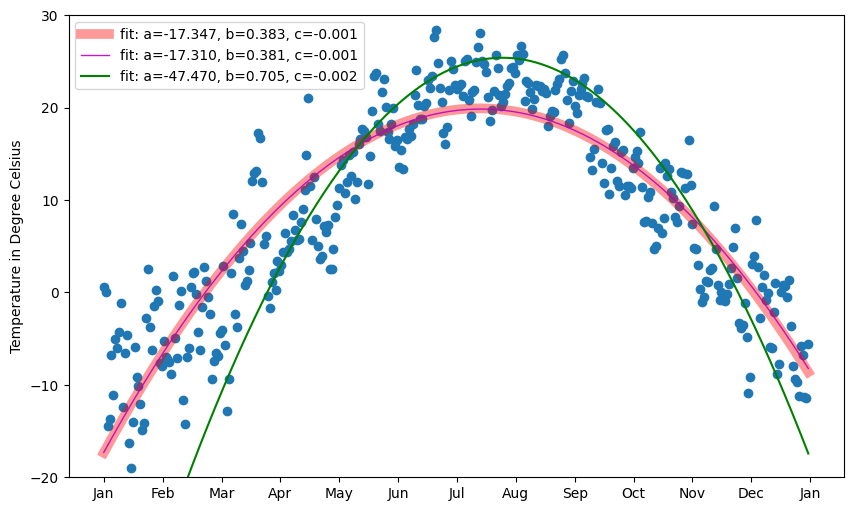

In [117]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(len(data_avg_temperature['Date'])),data_avg_temperature['Temp_C'])
plt.plot(np.arange(len(data_avg_temperature['Date'])),quadratic_func(np.arange(len(data_avg_temperature['Date'])),*popt),'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt),alpha=0.4,linewidth=7) 
plt.plot(np.arange(len(data_avg_temperature['Date'])),quadratic_func(np.arange(len(data_avg_temperature['Date'])),*popt_temp),'m-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_temp), alpha=0.9,linewidth= 1)
plt.plot(np.arange(len(data_avg_temperature['Date'])),quadratic_func(np.arange(len(data_avg_temperature['Date'])),*popt_temp_bias),'g-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_temp_bias))
plt.xticks(np.linspace(0,len(data_avg_temperature['Date']),13), months)
plt.ylabel('Temperature in Degree Celsius')
plt.ylim(-20,30)
plt.legend()
# plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 3)
plt.show()